In [3]:
from scipy.io import wavfile
import numpy as np
import librosa
from matplotlib import pyplot as plt
from scipy.signal import correlate, find_peaks
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [82]:
data, s = librosa.load('C:/Users/kesav/OneDrive/Desktop/Academics/speech signal processing/Assignment-2/lataji_nrm.wav')

In [83]:
length = data.shape[0]
t = length / s

441


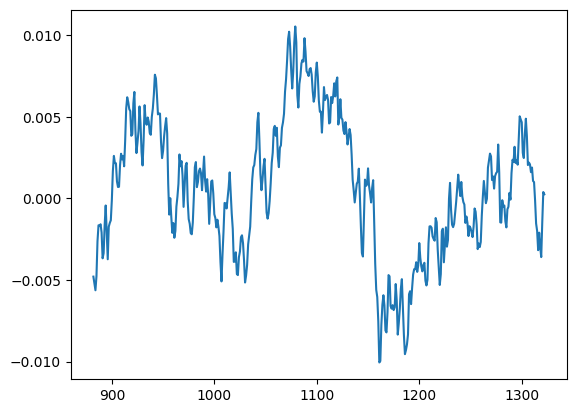

In [122]:
frame_size = 0.020
frame_stride = 0.01

frame_length,frame_step = frame_size * s, frame_stride * s
frame_length=round(frame_length)
print(frame_length)

signal_length=len(data)
num_frames =round(signal_length/frame_length)

frame_index=[0]
temp=0

for i in range(1,num_frames):
    temp+=frame_length
    frame_index.append(temp)


frame_no=2


x=range(frame_index[frame_no],frame_index[frame_no]+frame_length)
y=data[frame_index[frame_no]:frame_index[frame_no]+frame_length]

# y=np.array(y)
# y=y/np.max(y)

# plt.figure(0)
plt.plot(x,y)

IndexError: index 0 is out of bounds for axis 0 with size 0

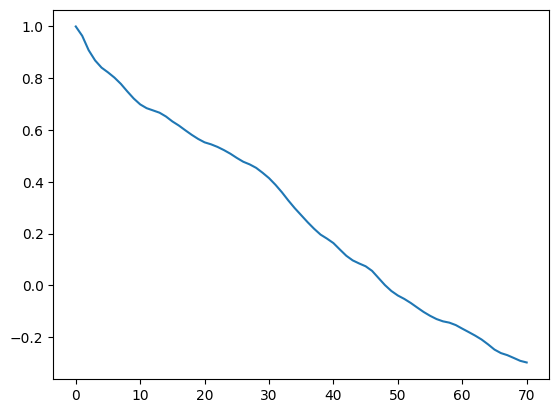

In [124]:
auto = sm.tsa.acf(y, nlags=70)
plt.plot(auto)

In [123]:
peaks = find_peaks(auto)[0]
lag = peaks[1]-peaks[0]
pitch = s/ lag
pitch

882.0

In [114]:
pitch=[]

for i in range(len(frame_index)):
    x=range(frame_index[i],frame_index[i]+frame_length)
    y=data[frame_index[i]:frame_index[i]+frame_length]
    amp_length = y.shape[0]
    time = length / s 
    auto = sm.tsa.acf(y, nlags=70)
    peaks = find_peaks(auto)[0]
    lag = peaks[0]
    pitch.append(s/ lag)
    

plt.ylim(0, 200)
plt.xlim(0,1000)
plt.plot(range(len(frame_index)),pitch)

765
765
765


IndexError: index 0 is out of bounds for axis 0 with size 0